In [2]:
from sympy import Symbol, init_printing, conjugate, sin, cos, factor, Matrix
from sympy import lambdify, Symbol, symbols
from sympy.physics.quantum import Dagger
init_printing()

In [3]:
from diagram_v2 import all_diagrams


--- Calculating H10 Interactions ---

--- Calculating Z1 Interactions ---

--- Defining Lepton Interactions with charged fields ---

Refactored script execution finished.


INFO: --- Creating Diagram: triangle_ni_GLp_GLm (FSS) ---
INFO: Vertex 1 ({{H_1^0}}-{{G_L^+}}-{{G_L^-}}) coupling found: -k_1*(\alpha_1**2 + 2*\alpha_1*\alpha_3 + \alpha_3**2 - 4*\lambda_1*\rho_1 - 4*\lambda_2*\rho_1)/\rho_1
INFO: Vertex 2 ({{G_L^+}}-\overline{n}[i]-\ell[b]) coupling found: L=-sqrt(2)*T_{RL}[i, b]/k_1, R=sqrt(2)*conjugate(Q_L[b, i])*m_\ell[b]/k_1
INFO: Vertex 3 ({{G_L^-}}-\overline{\ell}[a]-n[i]) coupling found: L=sqrt(2)*Q_L[a, i]*m_\ell[a]/k_1, R=-sqrt(2)*conjugate(T_{RL}[i, a])/k_1
INFO: Mass List for TriangleFSS: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_1}, m_{W_1}]
INFO: Successfully created triangle_ni_GLp_GLm (FSS)
INFO: --- Creating Diagram: triangle_ni_GRp_GRm (FSS) ---
INFO: Vertex 1 ({{H_1^0}}-{{G_R^+}}-{{G_R^-}}) coupling found: -k_1**3*(\alpha_1**2 + 2*\alpha_1*\alpha_3 + \alpha_3**2 - 4*\lambda_1*\rho_1 - 4*\lambda_2*\rho_1)/(\rho_1*v_R**2)
INFO: Vertex 2 ({{G_R^+}}-\overline{n}[i]-\ell[b]) coupling found: L=-sqrt(2)*conjugate(Q_R[b, i])*m_\ell[b]/v_

28 diagrams created and stored in all_diagrams dictionary.


In [ ]:
list(all_diagrams.keys())

['ni_GLp_GLm',
 'ni_GRp_GRm',
 'ni_HRp_HRm',
 'ni_GRp_HRm',
 'ni_HRp_GRm',
 'ni_W1p_W1m',
 'ni_W2p_W2m',
 'ni_W1p_GLm',
 'ni_W2p_GRm',
 'ni_W2p_HRm',
 'ni_GLp_W1m',
 'ni_GRp_W2m',
 'ni_HRp_W2m',
 'ni_W1',
 'ni_W2',
 'W1_ni',
 'W2_ni',
 'ni_GL',
 'ni_GR',
 'ni_HR',
 'GL_ni',
 'GR_ni',
 'HR_ni',
 'GL_ninj',
 'GR_ninj',
 'HR_ninj',
 'W1_ninj',
 'W2_ninj']

: 

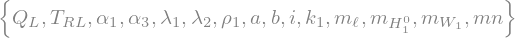

In [4]:
all_diagrams['ni_GLp_GLm'].AL().atoms(Symbol)

In [5]:
freesymbols = set()
for interaction, diagram in all_diagrams.items():
    freesymbols |= diagram.AL().atoms(Symbol)

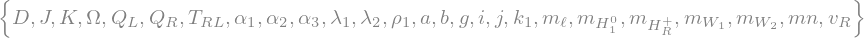

In [6]:
freesymbols

We have the following definitions
$$
Q_{L}^{\dagger} = U_{L}^{\dagger}V_{L}^{\ell}\\
Q_{R}^{\dagger} = U_{R}^{\top}V_{R}^{\ell}
$$
in the case of $V_{L}^{\ell} = V_{R}^{\ell} = \mathbf{I}$, we have

$$
Q_{L}^{\dagger} = U_{L}^{\dagger}\\
Q_{R}^{\dagger} = U_{R}^{\top}
$$

In [7]:
from DLRSM1.block_diagonalization_iss import ULmni, URmni, USmni, I3, eigenvalsMnu, mNi_changes, epsilon, mNi
from DLRSM1.block_diagonalization_iss import dict_Mii2, dict_muii, dict_Mii2_sqrt, dict_sqrt_muii_MDi, dict_Mii, mns_dummys, dummys_mns
from DLRSM1.block_diagonalization_iss import Unu

Key: M[0, 0]**2, Value: m_{n_4}*(m_{n_4} - mu[0, 0])


Key: M[1, 1]**2, Value: m_{n_5}*(m_{n_5} - mu[1, 1])


Key: M[2, 2]**2, Value: m_{n_6}*(m_{n_6} - mu[2, 2])




In [8]:
URmat = URmni
URT = URmat.T
URc = conjugate(URmat)
URDagger = Dagger(URmat)
ULmat = ULmni
ULT = ULmat.T
ULc = conjugate(ULmat)
ULDagger = Dagger(ULmat)
USmat = USmni
UST = USmat.T
USc = conjugate(USmat)
USDagger = Dagger(USmat)
Vl = I3

In [9]:
eigenvalsMnu = eigenvalsMnu.subs(mNi_changes)

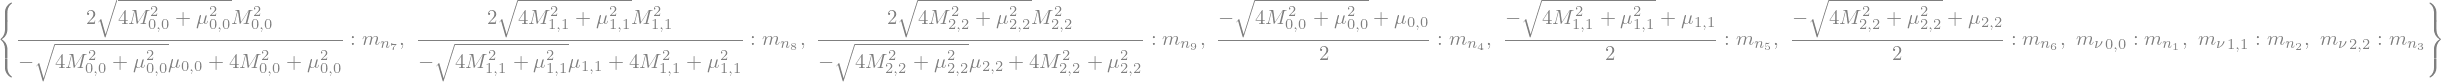

In [10]:
mNi_changes

In [11]:
dict_Mii

In [12]:
(-mNi[4] + mNi[7]).subs(
    {
        val:key for key, val in mNi_changes.items()
    }
).factor().subs(dict_sqrt_muii_MDi).subs(dict_Mii2).subs(dict_muii).factor()

In [13]:
GRLmat = (URT*conjugate(URmat)*(eigenvalsMnu)*ULDagger*ULc).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)

GSRmat = (USDagger*USc*(eigenvalsMnu)*URDagger*URc).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)

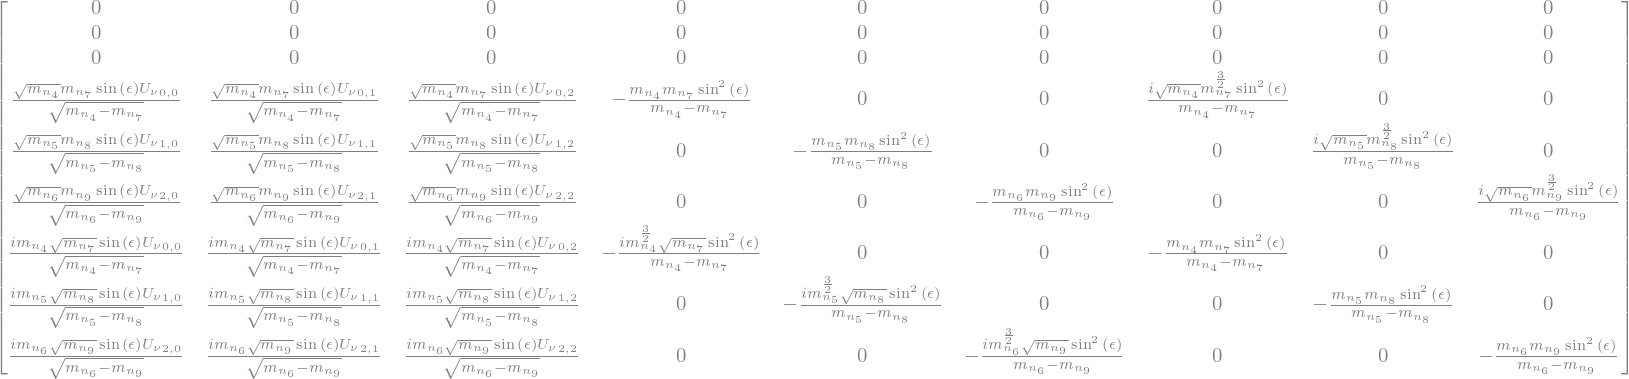

In [14]:
GRLmat

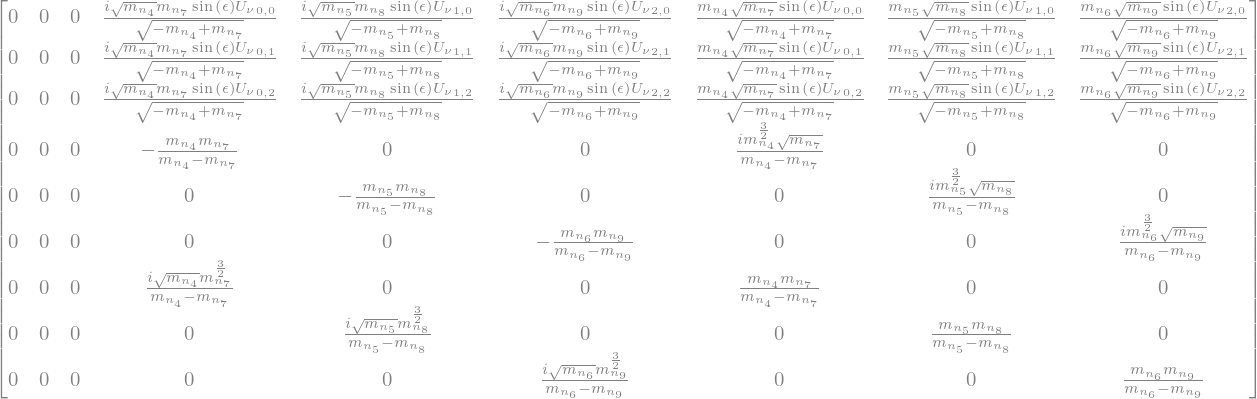

In [15]:
GSRmat

In [16]:
from DLRSM1.potential_senjanovic_HiggsDoublets import alpha1, alpha3, rho1
from DLRSM1.Gauge_Higgs_senjanovic_HiggsDoublets import mW1, k1

In [17]:
a13 = alpha1 + alpha3
Gamma_mat = (GRLmat - ((a13)/(2*rho1))*epsilon**2*Dagger(GSRmat)).subs(mns_dummys).simplify().subs(dummys_mns).applyfunc(
    lambda x:x.subs(sin(epsilon)**2, epsilon**2).factor(deep=True)
)

Omega_mat = (Gamma_mat + Gamma_mat.T).applyfunc(lambda x:x.expand().collect(rho1, factor))#.replace(epsilon**2,0)

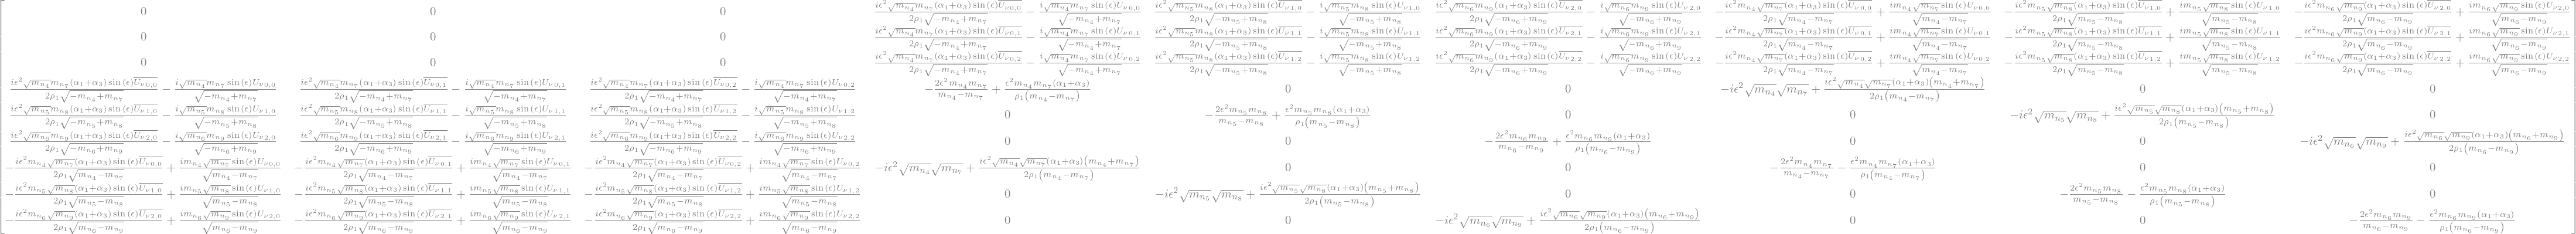

In [18]:
Omega_mat

In [19]:
QLDagger = (ULDagger*Vl).subs(mns_dummys).simplify().subs(dummys_mns)
QLmat = Dagger(QLDagger).subs(mns_dummys).simplify().subs(dummys_mns)

QRDagger = (URT*Vl).subs(mns_dummys).simplify().subs(dummys_mns)
QRmat = Dagger(QRDagger).subs(mns_dummys).simplify().subs(dummys_mns)

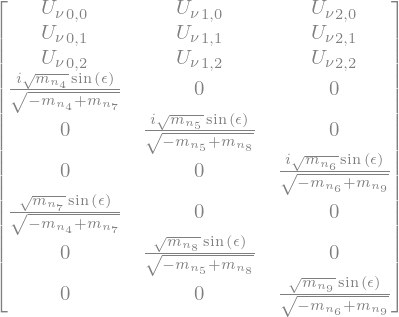

In [20]:
QLDagger

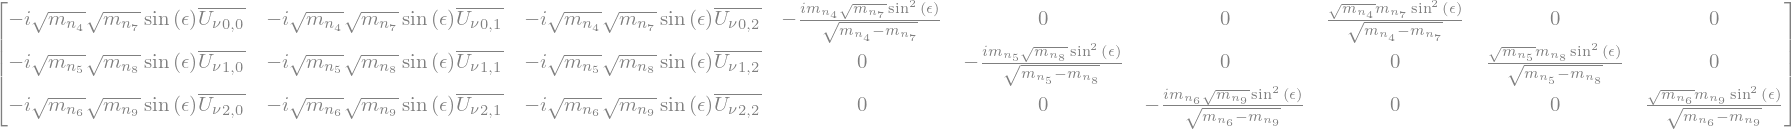

In [21]:
SRLmat = (QRmat*(eigenvalsMnu)*ULDagger*ULmat).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
SRLmat

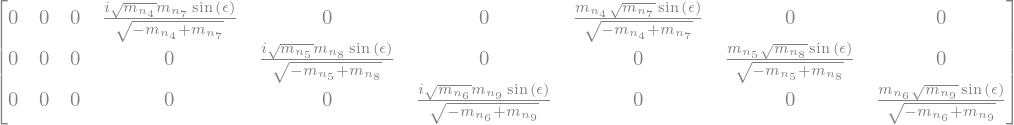

In [22]:
TRLmat = (URT*URc*(eigenvalsMnu)*QLDagger).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
TRLDagger = Dagger(TRLmat).subs(mns_dummys).simplify().subs(dummys_mns)
TRLDagger

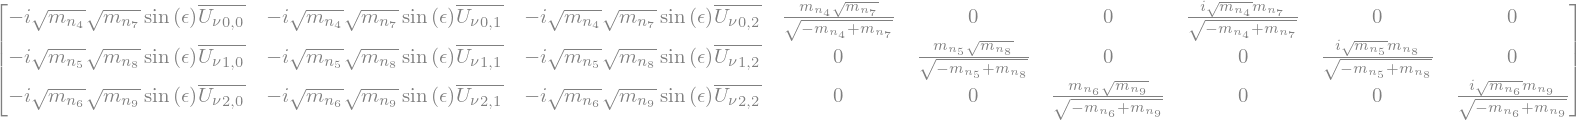

In [23]:
TSRmat = (USDagger*USc*(eigenvalsMnu)*URDagger*Vl).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
TSRDagger = Dagger(TSRmat).subs(mns_dummys).simplify().subs(dummys_mns)
TSRDagger

In [24]:
Kmat = (SRLmat - epsilon**2*TSRDagger).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
KDagger = Dagger(Kmat).subs(mns_dummys).simplify().subs(dummys_mns)


Jmat = (TSRDagger + SRLmat).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
JDagger = Dagger(Jmat).subs(mns_dummys).simplify().subs(dummys_mns)


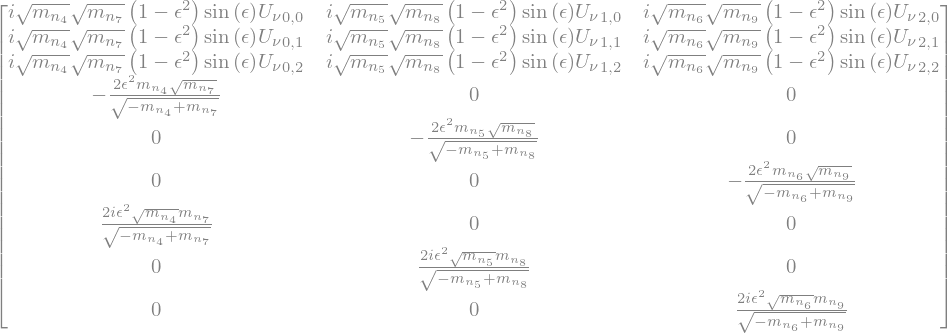

In [25]:
KDagger.subs(sin(epsilon)**2, epsilon**2)

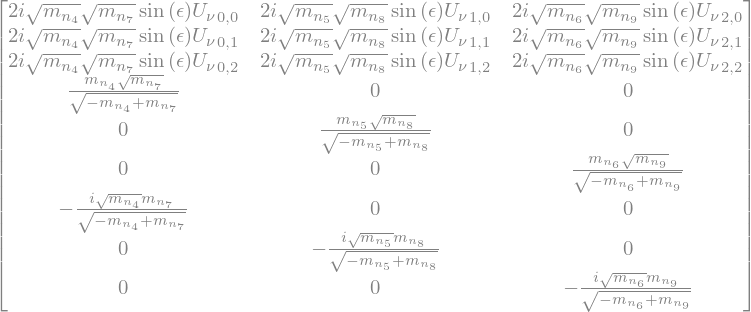

In [26]:
JDagger.subs(cos(epsilon),1)

In [27]:
from DLRSM1.FeynmanRules_senjanovic_H10_Z1_GM import QL, QR, TRL, K, J, Omega, ml, mn, i, j, a, b

In [28]:
AL = all_diagrams['ni_GL'].AL().factor()
AR = all_diagrams['ni_GL'].AR().factor()

In [29]:
mla, mlb, mni = symbols('m_{l_a}, m_{l_b}, m_{n_i}', positive=True)
QLai = symbols('Q_{Lai}')
QLbic = symbols(r'\overline{Q_{Lbi}}')
TRLib = symbols('T_{RLib}')
TRLiac  = symbols(r'\overline{T_{RLia}}')

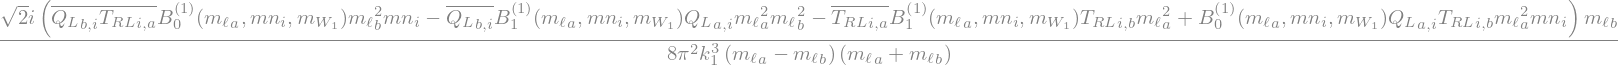

In [30]:
AR

In [31]:
AR_sym = AR.subs(ml[a], mla).subs(ml[b], mlb).subs(mn[i], mni).subs(
    QL[a,i], QLai
).subs(
    conjugate(QL[b, i]), QLbic
).subs(
    TRL[i, b], TRLib
).subs(
    conjugate(TRL[i, a]), TRLiac
)
AL_sym = AL.subs(ml[a], mla).subs(ml[b], mlb).subs(mn[i], mni).subs(
    QL[a,i], QLai
).subs(
    conjugate(QL[b, i]), QLbic
).subs(
    TRL[i, b], TRLib
).subs(
    conjugate(TRL[i, a]), TRLiac
)

In [32]:
from neutrinos import UpmnsStandardParametrization, NuOscObservables
Nudata = NuOscObservables

In [33]:
th12,th13,th23 = symbols(r'\theta_{12}, \theta_{13}, \theta_{23}')
mixing_angles = Nudata().substitutions(th12,th13,th23)

In [34]:
c12,c13,c23 = cos(th12), cos(th13), cos(th23)
s12,s13,s23 = sin(th12), sin(th13), sin(th23)
Upmns1 = UpmnsStandardParametrization(th12,th13,th23)

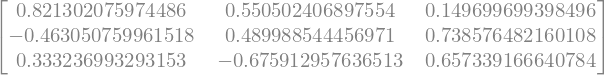

In [35]:
Upmns_val = Upmns1.subs(mixing_angles)
Upmns_val

In [36]:
Unu_changes = {
        Unu[i,j]:Upmns_val[i,j] for i in range(3) for j in range(3)
    }

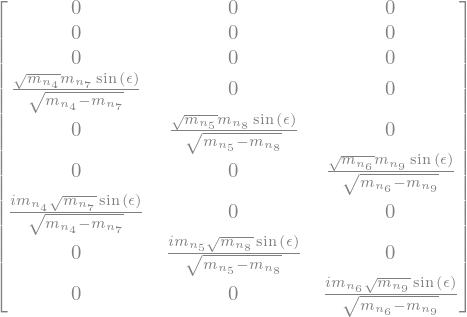

In [37]:
TRLmat.subs(
    Unu_changes
)

In [38]:
QLmat.atoms(Symbol)

In [39]:
QL_lamb = lambdify([epsilon, mNi[3], mNi[4], mNi[5], mNi[6], mNi[7], mNi[8]], QLmat.subs(
    Unu_changes
), 'mpmath')
TRL_lamb = lambdify([epsilon, mNi[3], mNi[4], mNi[5], mNi[6], mNi[7], mNi[8]], TRLmat, 'mpmath')

In [40]:
epsilon_val = 246/5000

In [41]:
print('QL = ', QL_lamb(epsilon_val, 1,2,3,4,5,6))
print('TRL = ', TRL_lamb(epsilon_val, 1,2,3,4,5,6))

QL =  [ 0.821302075974486   0.550502406897554  0.149699699398496  (0.0 - 0.0283941746623966j)                          0.0                          0.0  0.0567883493247931                 0.0                 0.0]
[-0.463050759961518   0.489988544456971  0.738576482160108                          0.0  (0.0 - 0.0401554268999517j)                          0.0                 0.0  0.0634913047101209                 0.0]
[ 0.333236993293153  -0.675912957636513  0.657339166640784                          0.0                          0.0  (0.0 - 0.0491801531542557j)                 0.0                 0.0  0.0695512395903344]
TRL =  [                        0.0                         0.0                         0.0]
[                        0.0                         0.0                         0.0]
[                        0.0                         0.0                         0.0]
[ (0.0 - 0.113576698649586j)                         0.0                         0.0]
[                     

In [42]:
from LFVXD.numeric.mpmath_definitions import B1_0, B1_1

In [43]:
AL_lamb = lambdify(
    [QLai, QLbic, TRLib, TRLiac, mW1, mni, mla, mlb, k1],
    AL_sym, modules=[{'B1_0':B1_0, 'B1_1':B1_1},'mpmath']
)
AR_lamb = lambdify(
    [QLai, QLbic, TRLib, TRLiac, mW1, mni, mla, mlb, k1],
    AR_sym, modules=[{'B1_0':B1_0, 'B1_1':B1_1},'mpmath']
)

In [44]:
import mpmath as mp
mp.dps = 120; mp.pretty = True

In [45]:
d21 = mp.mpf(str(Nudata.squareDm21.central))*mp.mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mp.mpf(str(Nudata.squareDm31.central))*mp.mpf('1e-18')
mn1_val = mp.mpf('1e-12')  #GeV 
mn2_val = mp.sqrt(mn1_val**2 + d21)
mn3_val = mp.sqrt(mn1_val**2 + d31)
mn4_val = 1000
mn5_val = 2000
mn6_val = 3000
mn7_val = mn4_val + epsilon_val
mn8_val = mn5_val + epsilon_val
mn9_val = mn6_val + epsilon_val 
mni_vals = [
    mn1_val,
    mn2_val,
    mn3_val,
    mn4_val,
    mn5_val,
    mn6_val,
    mn7_val,
    mn8_val,
    mn9_val
]
me_val = 0.001
mmu_val = 0.105
mtau_val = 1.776
ml_vals = [
    me_val,
    mmu_val,
    mtau_val
]

QL = QL_lamb(epsilon_val, *mni_vals[3:])
TRL = TRL_lamb(epsilon_val, *mni_vals[3:])

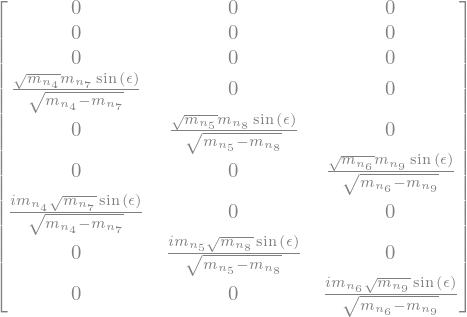

In [46]:
TRLmat

In [72]:

def AL_sum(mns, mW1, k1, a, b):
    al = 0
    ar = 0
    for i in range(3, len(mns)): #len(mns)
        QLai = QL[a, i]
        QLbic = conjugate(QL[b, i])
        TRLib = TRL[i, b]
        TRLiac = conjugate(TRL[i, a])
        #if al != mp.mpf('nan'):
        al += AL_lamb(QLai, QLbic, TRLib, TRLiac, mW1, mns[i], ml_vals[a], ml_vals[b], k1)
        #else:
        #    print('Warning: we found nan with the particles in the loop mla = {ml_vals[a]}, mlb = {ml_vals[b]},  M0 = {mns[i]}, M1 = {mW1}')
        #if ar != mp.mpf('nan'):
        ar += AR_lamb(QLai, QLbic, TRLib, TRLiac, mW1, mns[i], ml_vals[a], ml_vals[b], k1)
        #else:print('Warning: we found nan with the particles in the loop mla = {ml_vals[a]}, mlb = {ml_vals[b]},  M0 = {mns[i]}, M1 = {mW1}')
        print(al, ar)
    return al, ar

In [74]:
AL_sum(mni_vals, 80, 246, 1, 2)

(0.0 + 0.0j) (0.0 + 0.0j)
(0.0 + 0.0j) (0.0 + 0.0j)
(0.0 + 0.0j) (0.0 + 0.0j)
(0.0 + 0.0j) (0.0 + 0.0j)
(0.0 + 0.0j) (0.0 + 0.0j)
(0.0 + 0.0j) (0.0 + 0.0j)


(mpc(real='0.0', imag='0.0'), mpc(real='0.0', imag='0.0'))

In [77]:
i = 3
a = 1
b = 2
QLai = QL[a, i]
QLbic = conjugate(QL[b, i])
TRLib = TRL[i, b]
TRLiac = conjugate(TRL[i, a])
AL_lamb(QLai, QLbic, TRLib, TRLiac, 80, mni_vals[i], ml_vals[a], ml_vals[b], 246)

mpc(real='0.0', imag='0.0')

(0.0 + 0.0j) (0.0 + 0.0j)
(0.0 + 0.0j) (0.0 + 0.0j)
(0.0 + 0.0j) (0.0 + 0.0j)
(0.0 + 0.0j) (0.0 + 0.0j)
(0.0 + 0.0j) (0.0 + 0.0j)
(0.0 + 0.0j) (0.0 + 0.0j)


(mpc(real='0.0', imag='0.0'), mpc(real='0.0', imag='0.0'))

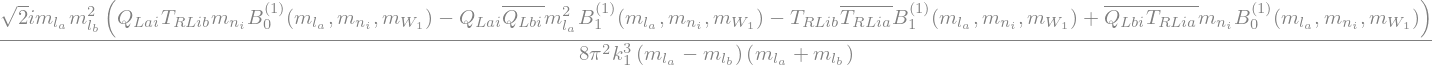

In [63]:
AL_sym#.atoms(Symbol)

In [78]:
B1_0_vals_i_a1 = [B1_0(ml_vals[1], m, 80) for m in mni_vals]
B1_0_vals_i_a1

[mpf('nan'),
 mpf('nan'),
 mpf('nan'),
 mpc(real='-12.848048114236587', imag='0.0'),
 mpc(real='-14.212122779717015', imag='0.0'),
 mpc(real='-15.017893420410541', imag='0.0'),
 mpc(real='-12.848143923475531', imag='0.0'),
 mpc(real='-14.212170595892397', imag='0.0'),
 mpc(real='-15.017926074173772', imag='0.0')]

In [79]:
B1_1_vals_i_a1 = [B1_1(ml_vals[1], m, 80) for m in mni_vals]
B1_1_vals_i_a1

[mpf('nan'),
 mpf('nan'),
 mpf('nan'),
 mpc(real='2.5493982931838737', imag='0.0'),
 mpc(real='-264.35272421058181', imag='0.0'),
 mpc(real='496.86148827990434', imag='0.0'),
 mpc(real='1.2441653120199243', imag='0.0'),
 mpc(real='212.92709923225274', imag='0.0'),
 mpc(real='-451.27364641045205', imag='0.0')]

In [54]:
from LFVXD.numeric.mpmath_definitions import y11np, y12np

In [13]:
y11np(ml_vals[1], mn1_val, 80)

mpf('-580497.86621315207')

In [14]:
y12np(ml_vals[1], mn1_val, 80)

mpf('0.0')

In [ ]:
#@jit()
def y12(mi,M0,M1):
    a = mp.power(mi,2) #mi**2
    b = - (mp.power(mi,2) + mp.power(M0,2) - mp.power(M1,2))#- (mi**2 + M0**2 - M1**2)
    c = mp.power(M0,2) #M0**2
    return mp.polyroots([a,b,c],extraprec=140)[1]

In [18]:
mi = ml_vals[1]
M0 = mn1_val
M1 = 80
a = mp.power(mi,2)
b = - (mp.power(mi,2) + mp.power(M0,2) - mp.power(M1,2))
c = M0**2
a, b, c

(mpf('0.011024999999999998'),
 mpf('6399.9889750000002'),
 mpf('9.9999999999999992e-25'))

In [21]:
mp.polyroots([a,b,c],extraprec=500)[1]

mpf('0.0')